**TASK-4:SALES PREDICTION**

**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING THE DATASET**

In [48]:
df=pd.read_csv('/content/advertising.csv')

In [49]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#number of rows and columns
df.shape

(200, 4)

**CHECKING FOR MISSING VALUES**

In [8]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values

**VISUALIZING THE DATA**

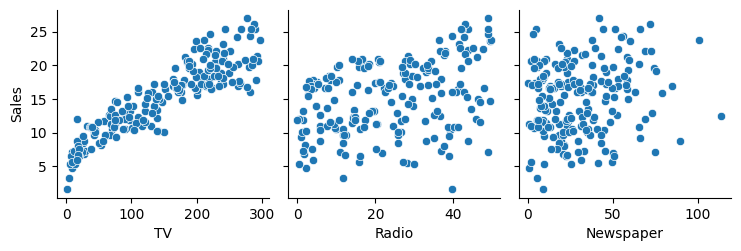

In [20]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

Increase in sales occur with increase in ads in TV

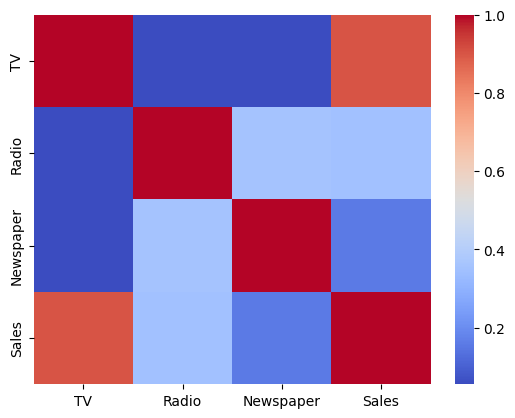

In [23]:
sns.heatmap(df.corr(),cmap="coolwarm")
plt.show()

> Sales is highly correlated with TV

> So lets perform linear regression using TV











**MODEL BUILDING**

 **TRAINING DATA AND TESTING DATA**

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.2,random_state=2)

In [35]:
print(X_train)

        TV
137  273.7
163  163.5
111  241.7
123  123.1
109  255.4
..     ...
43   206.9
22    13.2
72    26.8
15   195.4
168  215.4

[160 rows x 1 columns]


In [36]:
print(Y_train)

     Sales
137   20.8
163   18.0
111   21.8
123   15.2
109   19.8
..     ...
43    17.9
22     5.6
72     8.8
15    22.4
168   17.1

[160 rows x 1 columns]


**LINEAR REGRESSION**

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

**MODEL PREDICTION**

In [42]:
X_train_prediction=model.predict(X_train)
print(X_train_prediction)

[[22.55472777]
 [16.12060723]
 [20.68638061]
 [13.76181893]
 [21.48626674]
 [17.88385986]
 [16.90881619]
 [ 6.61539103]
 [10.86004224]
 [ 7.08247782]
 [14.26393723]
 [19.55953373]
 [19.10996269]
 [17.73205666]
 [10.21195932]
 [12.98528714]
 [ 8.41367517]
 [ 7.07663923]
 [ 7.71888357]
 [22.74156249]
 [21.10092014]
 [19.40773052]
 [12.8451611 ]
 [23.71660617]
 [23.17361777]
 [10.97097536]
 [21.39284938]
 [ 8.03416716]
 [ 7.33937555]
 [12.68168073]
 [15.71774487]
 [ 7.61962763]
 [20.59296325]
 [13.34727941]
 [ 9.17269121]
 [ 7.7072064 ]
 [ 7.57875754]
 [ 9.18436838]
 [16.64607987]
 [23.27287372]
 [20.77395938]
 [22.157704  ]
 [16.17899308]
 [16.24321751]
 [20.54625457]
 [20.00910476]
 [20.59296325]
 [15.3207211 ]
 [23.48890136]
 [13.91362214]
 [19.32599033]
 [ 7.25763537]
 [12.05695214]
 [19.44860061]
 [13.61001573]
 [23.67573607]
 [17.53938336]
 [23.00429881]
 [18.87641929]
 [19.33182892]
 [11.14029432]
 [11.25706602]
 [17.37006439]
 [10.98265253]
 [21.22353042]
 [13.63920865]
 [20.43532

In [84]:
from sklearn.metrics import mean_squared_error

rmse =np.sqrt(mean_squared_error(Y_train, X_train_prediction))
print('Root Mean squared error:',rmse)

Root Mean squared error: 2.2168428050628504


In [75]:
model.coef_

array([[0.05838585]])

In [76]:
model.intercept_

array([6.57452093])

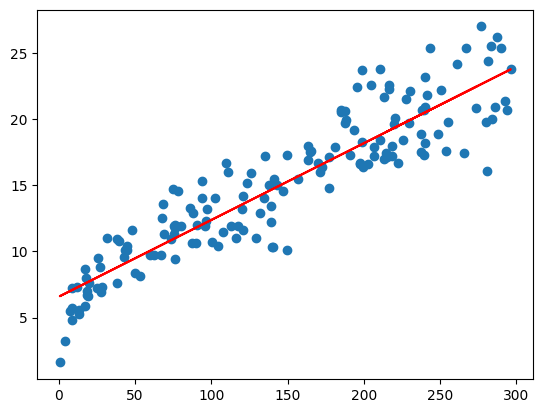

In [77]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.574 + 0.058*X_train, 'r')
plt.show()

In [56]:
X_test_prediction=model.predict(X_test)

In [57]:
print(X_test_prediction)

[[16.83291458]
 [10.69656187]
 [ 9.85580564]
 [20.12587646]
 [16.31328053]
 [17.85466694]
 [10.43382555]
 [21.91248344]
 [10.95929819]
 [23.54728721]
 [ 7.96410414]
 [19.28512024]
 [12.2671412 ]
 [ 7.02993056]
 [19.55953373]
 [ 7.57875754]
 [ 8.04000574]
 [15.41997704]
 [18.81219486]
 [18.49107269]
 [19.90401024]
 [21.92416061]
 [ 9.93170725]
 [ 8.72895876]
 [20.2660025 ]
 [16.40669789]
 [16.79788307]
 [10.60314451]
 [19.8397858 ]
 [19.65295109]
 [22.72988532]
 [14.22890572]
 [18.24001354]
 [14.52667355]
 [ 6.88980452]
 [12.98528714]
 [19.43692344]
 [21.0775658 ]
 [22.05844806]
 [17.23577694]]


In [83]:
rmse =np.sqrt(mean_squared_error(Y_test, X_test_prediction))
print('Root Mean squared error:', rmse)

Root Mean squared error: 2.5977527204946065


In [65]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, X_test_prediction)
r_squared

0.6523236772792509

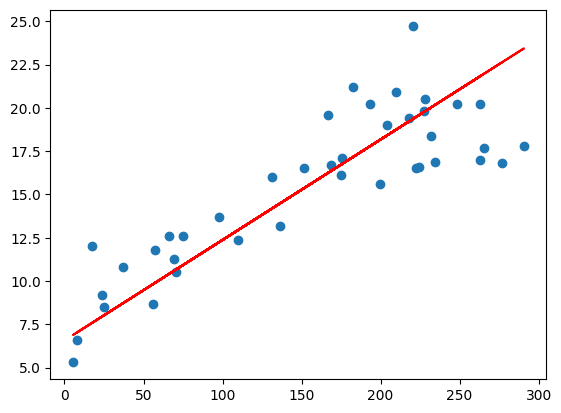

In [79]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.574 + 0.058*X_test, 'r')
plt.show()